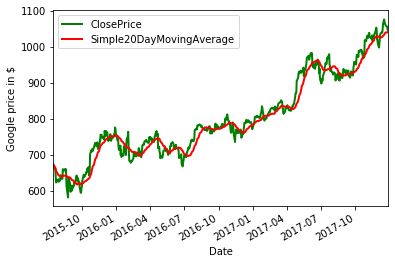

In [2]:
import pandas as pd

from pandas_datareader import data

start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)
goog_data = goog_data2.tail(620)


close = goog_data['Close']

'''
The Simple Moving Average (SMA) is calculated
 by adding the price of an instrument over a number of time periods
 and then dividing the sum by the number of time periods. The SMA
 is basically the average price of the given time period, with equal
 weighting given to the price of each period.
Simple Moving Average
SMA = ( Sum ( Price, n ) ) / n    
Where: n = Time Period
'''
import statistics as stats

time_period = 20 # number of days over which to average
history = [] # to track a history of prices
sma_values = [] # to track simple moving average values
for close_price in close:
  history.append(close_price)
  if len(history) > time_period: # we remove oldest price because we only average over last 'time_period' prices
    del (history[0])
  sma_values.append(stats.mean(history))

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Simple20DayMovingAverage=pd.Series(sma_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
sma = goog_data['Simple20DayMovingAverage']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()

In [3]:
close_price

Date
2015-07-17     672.929993
2015-07-20     663.020020
2015-07-21     662.299988
2015-07-22     662.099976
2015-07-23     644.280029
2015-07-24     623.559998
2015-07-27     627.260010
2015-07-28     628.000000
2015-07-29     631.929993
2015-07-30     632.590027
2015-07-31     625.609985
2015-08-03     631.210022
2015-08-04     629.250000
2015-08-05     643.780029
2015-08-06     642.679993
2015-08-07     635.299988
2015-08-10     633.729980
2015-08-11     660.780029
2015-08-12     659.559998
2015-08-13     656.450012
2015-08-14     657.119995
2015-08-17     660.869995
2015-08-18     656.130005
2015-08-19     660.900024
2015-08-20     646.830017
2015-08-21     612.479980
2015-08-24     589.609985
2015-08-25     582.059998
2015-08-26     628.619995
2015-08-27     637.609985
                 ...     
2017-11-16    1032.500000
2017-11-17    1019.090027
2017-11-20    1018.380005
2017-11-21    1034.489990
2017-11-22    1035.959961
2017-11-24    1040.609985
2017-11-27    1054.209961
2017-11

In [4]:
close

Date
2015-07-17     672.929993
2015-07-20     663.020020
2015-07-21     662.299988
2015-07-22     662.099976
2015-07-23     644.280029
2015-07-24     623.559998
2015-07-27     627.260010
2015-07-28     628.000000
2015-07-29     631.929993
2015-07-30     632.590027
2015-07-31     625.609985
2015-08-03     631.210022
2015-08-04     629.250000
2015-08-05     643.780029
2015-08-06     642.679993
2015-08-07     635.299988
2015-08-10     633.729980
2015-08-11     660.780029
2015-08-12     659.559998
2015-08-13     656.450012
2015-08-14     657.119995
2015-08-17     660.869995
2015-08-18     656.130005
2015-08-19     660.900024
2015-08-20     646.830017
2015-08-21     612.479980
2015-08-24     589.609985
2015-08-25     582.059998
2015-08-26     628.619995
2015-08-27     637.609985
                 ...     
2017-11-16    1032.500000
2017-11-17    1019.090027
2017-11-20    1018.380005
2017-11-21    1034.489990
2017-11-22    1035.959961
2017-11-24    1040.609985
2017-11-27    1054.209961
2017-11